In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


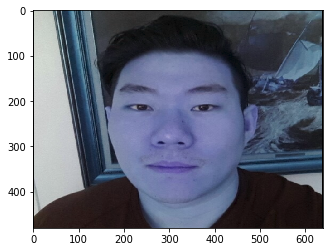

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/kyuhwan2.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # 640x480의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

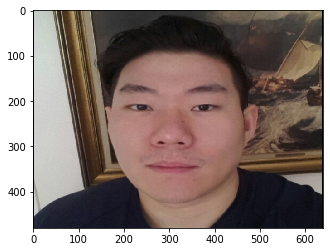

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

dlib 을 이용해 hog detector 를 선언

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


Detector 를 이용해 얼굴의 bounding box 를 추출

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(171, 142) (438, 409)]]


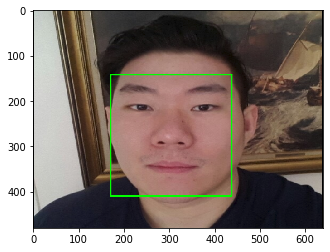

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


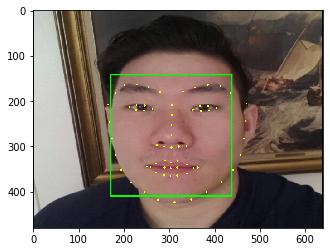

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0] 
    y = landmark[8][1] - dlib_rect.width()
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(305, 275)
(x,y) : (305,155)
(w,h) : (268,268)


내 코의 중심점: (305,275)

In [11]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print (img_sticker.shape)
plt.show()


(268, 268, 3)


#plt.imshow 이전에 RGB 이미지로 바꾸기
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker)
plt.show()

In [12]:
refined_x = x - w // 2  # left
refined_y = y #- h        # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (171,155)


In [13]:
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (171,155)


sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y: refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

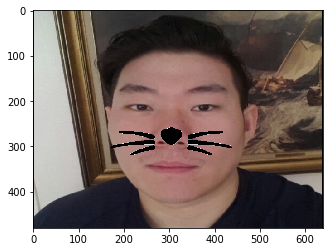

In [14]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+ img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker== 255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

우선 저는 옆으로된 사진, 멀리있는사진, 각도가 밑에서 위로 찍힌사진, 밝은사진, 흑백사진 등 을 실험해보았습니다.

옆으로 된 사진은 우선 맨마지막 단계에서 오류가 났습니다. 아무래도 얼굴 전체적으로 68개의 점이 모두 나오지 못하고 찌그러져서 일부 landmark 가 표시가 되지 않는다는것을 확인할수 있었습니다.

멀리있는사진(정면사진) 은 고양이 수염자체도 멀리있는 사진 비율만큼 줄어들어 잘 작동이 되었습니다.

각도가 밑에서 위로 찍은 사진또한 각도에 따라 68개의 점이 모두 표시가 되지 않으면 오류가 발생하였습니다.

밝기는 얼굴이 안보일정도로 밝은 사진이 아니면 잘 작동하였습니다. 흑백사진또한 잘 작동하는것을 볼수 있엇습니다.


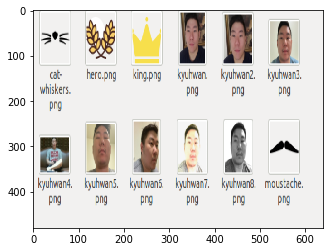

In [15]:
path = os.getenv('HOME')+'/aiffel/camera_sticker/images/submission.png'
submission = cv2.imread(path)    #- OpenCV로 이미지를 읽어서s
sub_img= cv2.resize(submission, (640, 480))     
sub_rgb = cv2.cvtColor(sub_img, cv2.COLOR_BGR2RGB)
plt.imshow(sub_rgb)
plt.show()